<div style="background: linear-gradient(to right, #2E64FE, #5858FA); 
            padding: 15px; 
            border-radius: 15px;
            text-align: center;
            box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
    <h1 style="color: white; 
               font-family: Arial, sans-serif;
               margin: 0;
               text-shadow: 2px 2px 4px rgba(0,0,0,0.2);">
        Heart Disease Prediction Using ML Algorithms
    </h1>
    <p style="color: #E0E0E0;
              font-style: italic;
              margin-top: 10px;">
        A Comprehensive Analysis of Multiple Classification Approaches
    </p>
</div>

<div align="center">
    <h3 style="color: #5858FA; font-style: italic; margin-top: 20px;">
        Syeda Rysham Nadeem
    </h3>
</div>

<div style="text-align: center; margin: 20px 0;">
    <img src="https://dvl2h13awlxkt.cloudfront.net/assets/general-images/Knowledge/_1200x630_crop_center-center_82_none/CVD-iStock-1266230179.jpg?mtime=1653282867" 
         alt="Heart Disease" 
         style="max-width: 800px; 
                width: 100%; 
                border-radius: 10px; 
                box-shadow: 0 4px 8px rgba(0,0,0,0.2);">
</div>

## Abstract

Heart disease stands as the predominant cause of mortality in contemporary times. The exponential rise in cardiac cases necessitates effective early prediction mechanisms, as timely diagnosis can be the difference between life and death. While diagnosis presents significant challenges, machine learning offers powerful tools and algorithms for analyzing healthcare data to predict and diagnose heart conditions.

### Global Impact
According to the World Health Organization (WHO):
- Approximately 17.9 million deaths annually are attributed to heart attacks
- Major risk factors include:
    - Unhealthy dietary habits 
    - Physical inactivity
    - Tobacco use
    - Excessive alcohol consumption

### Medical Background
Heart attacks occur when blood circulation to the heart is obstructed by arterial plaque buildup. The challenge in diagnosis stems from symptoms overlapping with other medical conditions, making accurate identification complex.

### Methodology 
This research employs multiple machine learning algorithms:
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Support Vector Machine (SVM)
- Naïve Bayes
- Decision Tree 
- Random Forest
- Gradient Boosting

### Objectives
- Predict and classify patients with heart disease
- Compare performance metrics across different algorithms
- Develop an optimized ensemble model for improved accuracy 
- Validate results against established medical diagnostics

### Significance
The proposed model demonstrates promising results in detecting cardiac conditions, achieving competitive accuracy rates compared to traditional classifiers. This research contributes to the growing field of AI-assisted medical diagnostics, potentially improving early detection and patient outcomes.

---
*Keywords: Machine Learning, Heart Disease Prediction, Healthcare Analytics, Classification Algorithms, Medical Diagnosis*

# Import necessary libraries
<div style="background-color:rgb(24, 11, 11); 
            padding: 20px; 
            border-left: 5px solidrgb(2, 10, 32);
            margin: 10px 0;
            border-radius: 5px;">
    <p style="color: #9999; 
              margin: 0;
              font-size: 15px;">
        Import essential Python libraries for data analysis, machine learning, and visualization
    </p>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib.collections import PathCollection
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

# Data Loading and Preprocessing
Load heart disease datasets, handle missing values, perform feature scaling, and encode categorical variables.

In [2]:

df_heart_disease = pd.read_csv("dataset/heart.csv")
df_heart_disease['target'] = pd.to_numeric(df_heart_disease['target'], errors='coerce')
df_heart_disease.fillna(df_heart_disease.mean(), inplace=True)
# Separate features and target before scaling
X = df_heart_disease.drop('target', axis=1)
y = df_heart_disease['target']
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df_heart_disease = pd.concat([X_scaled, y], axis=1)
display(df_heart_disease.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


# Exploratory Data Analysis
Analyze feature distributions, correlations, and relationships with target variable using visualizations.

<Figure size 1600x600 with 0 Axes>

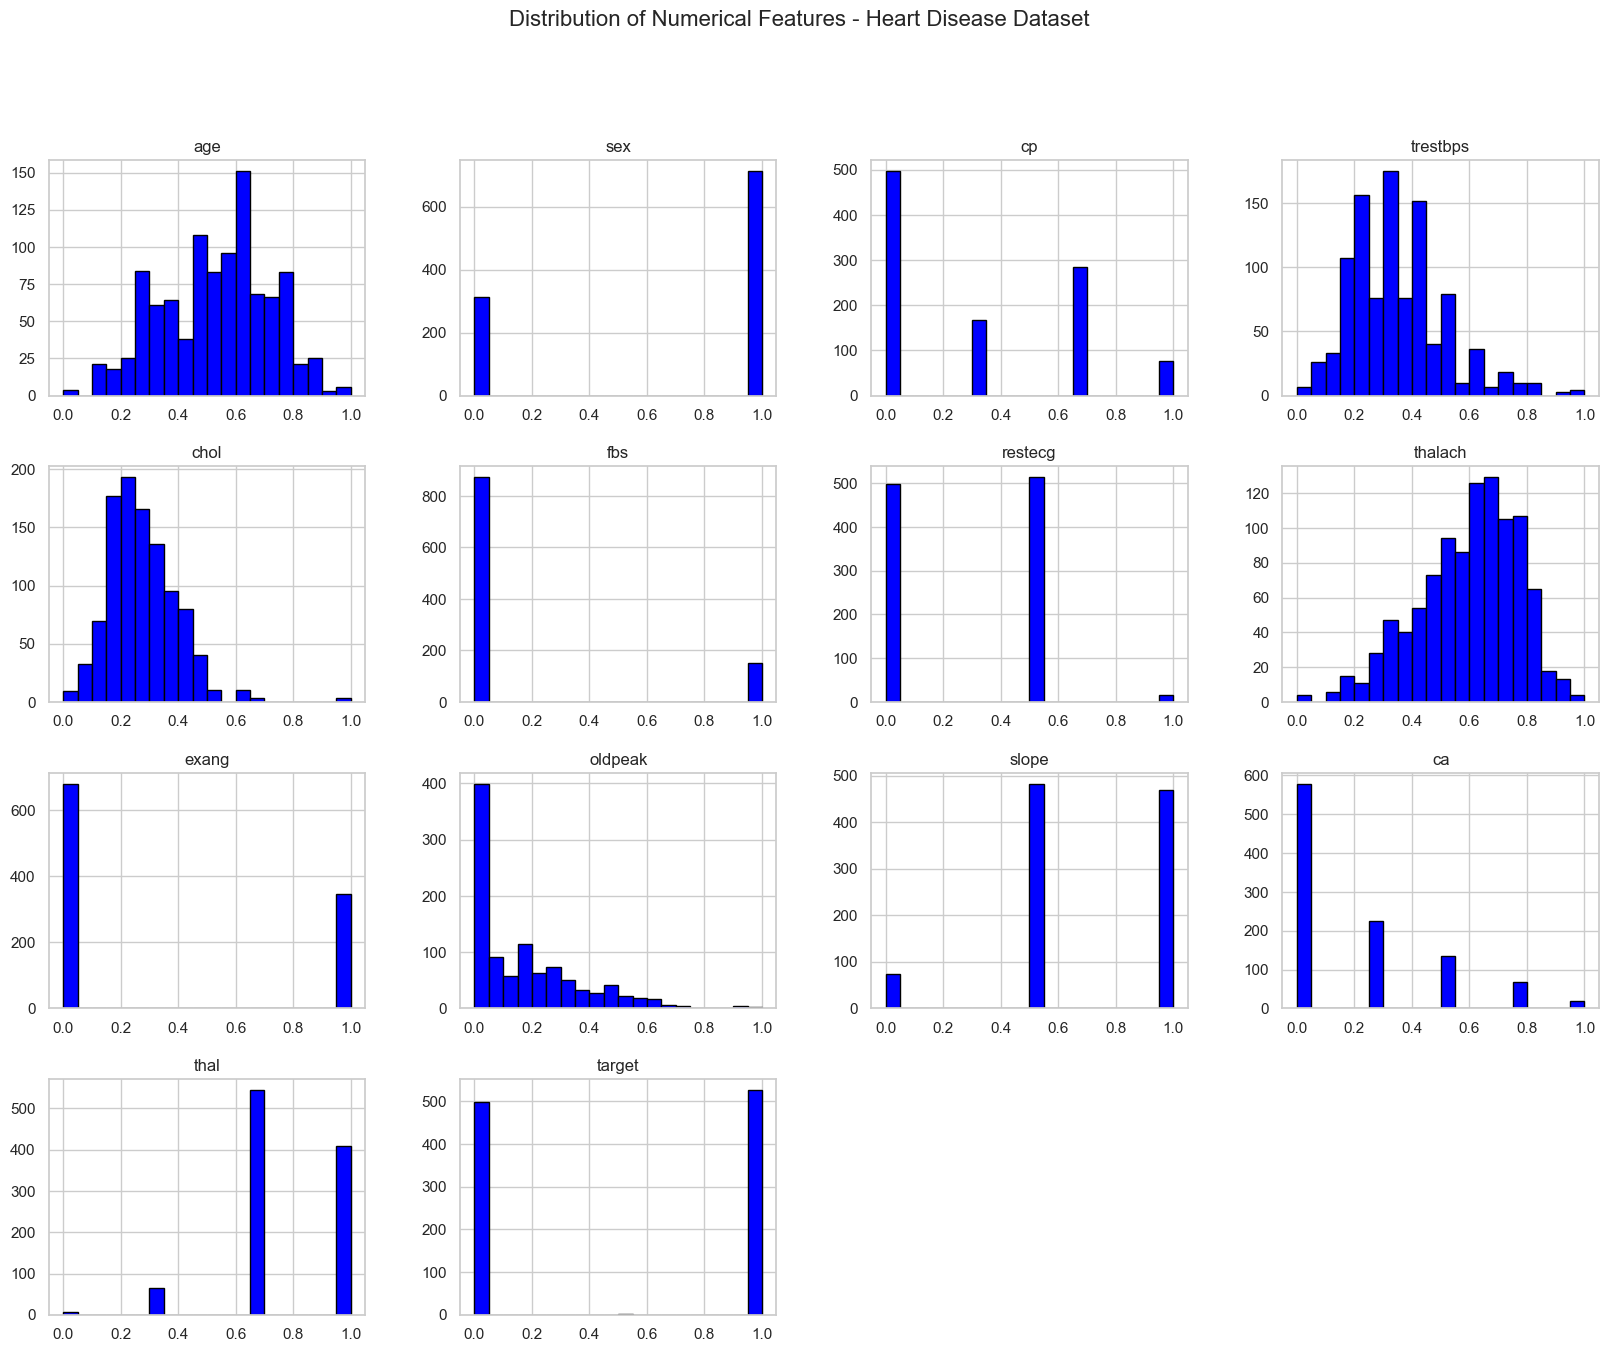

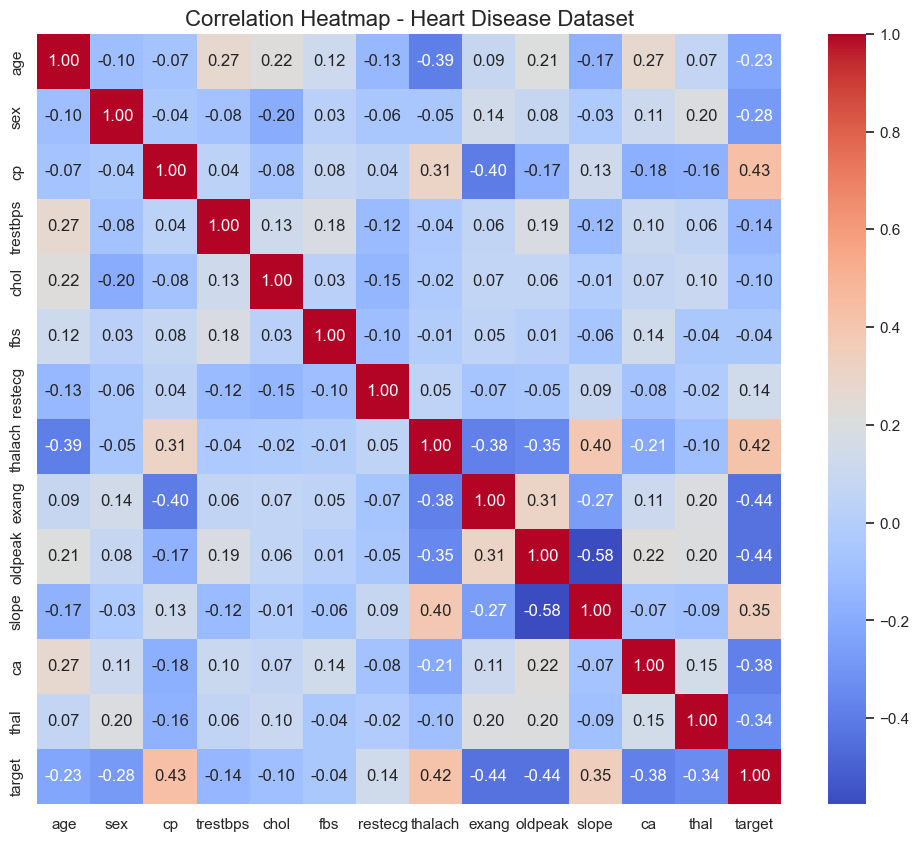

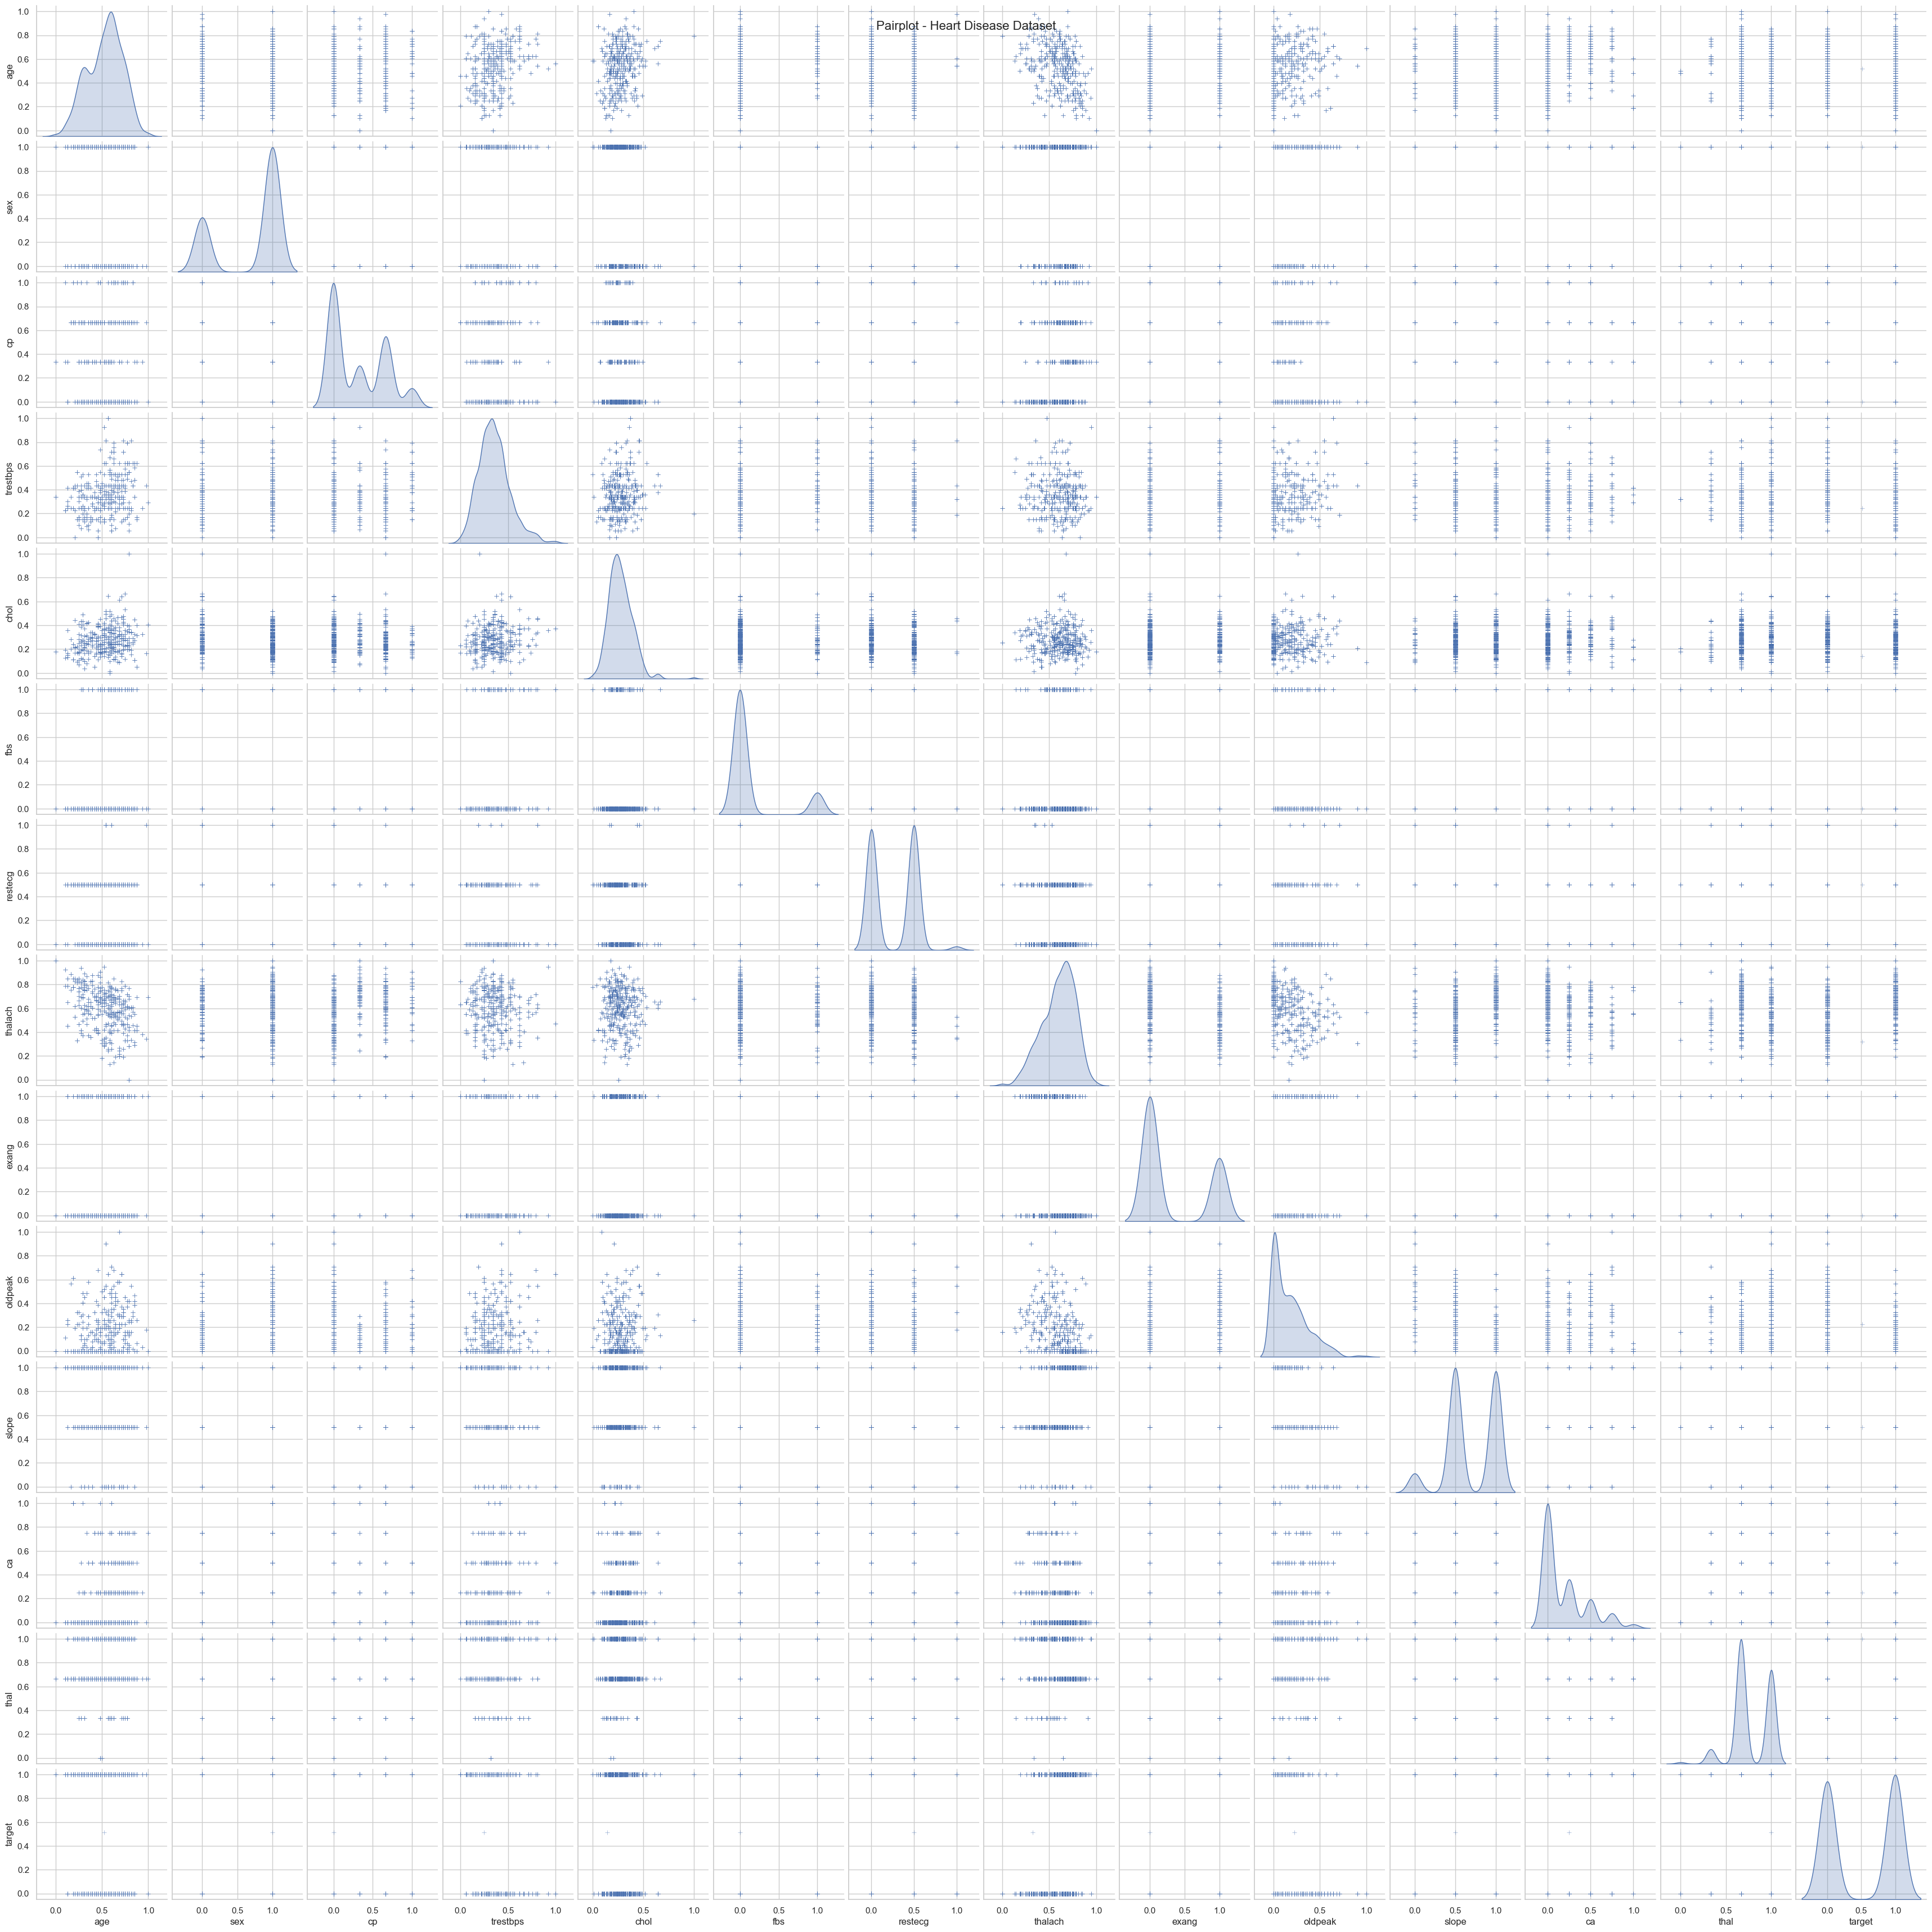

In [3]:
# Set visualization styles
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot distributions of numerical features for heart disease dataset
df_heart_disease.hist(bins=20, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features - Heart Disease Dataset', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for heart disease dataset
plt.figure(figsize=(12, 10))
sns.heatmap(df_heart_disease.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap - Heart Disease Dataset', fontsize=16)
plt.show()

# Pairplot for heart disease dataset
sns.pairplot(df_heart_disease, diag_kind='kde', markers='+', plot_kws={'alpha':0.6})
plt.suptitle('Pairplot - Heart Disease Dataset', fontsize=16)
plt.show()


# Base Model Implementation
Implement and train multiple models: KNN, Logistic Regression, SVM, Naïve Bayes, Decision Tree, Random Forest, and Gradient Boosting.

In [29]:
# Store train-test splits for heart disease dataset
X_train_hd, X_test_hd, y_train_hd, y_test_hd = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models dictionary
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(kernel='linear', probability=True),
    'Naïve Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}


## Training models on heart disease dataset

In [30]:
# Convert target variable to binary classes
y_train_hd_binary = (y_train_hd >= 0.5).astype(int)
y_test_hd_binary = (y_test_hd >= 0.5).astype(int)

# Train models with binary target
for name, model in models.items():
    model.fit(X_train_hd, y_train_hd_binary)

# Create a results DataFrame
models_results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Calculate metrics for each model on heart disease dataset
for name, model in models.items():
    y_pred = model.predict(X_test_hd)
    accuracy = accuracy_score(y_test_hd_binary, y_pred)
    precision = precision_score(y_test_hd_binary, y_pred)
    recall = recall_score(y_test_hd_binary, y_pred)
    f1 = f1_score(y_test_hd_binary, y_pred)
    
    # Add results to DataFrame
    models_results = pd.concat([models_results, pd.DataFrame({
        'Model': [name],
        'Accuracy': [f"{accuracy:.3f}"],
        'Precision': [f"{precision:.3f}"],
        'Recall': [f"{recall:.3f}"],
        'F1-Score': [f"{f1:.3f}"]
    })])

## Reset index and format table


In [31]:
models_results = models_results.reset_index(drop=True)

# Display results
print("\nHeart Disease Dataset - Model Performance Comparison")
print("-" * 80)
display(models_results)


Heart Disease Dataset - Model Performance Comparison
--------------------------------------------------------------------------------


,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.902,0.895,0.913,0.904
1,Logistic Regression,0.795,0.756,0.874,0.811
2,SVM,0.805,0.756,0.903,0.823
3,Naïve Bayes,0.800,0.754,0.893,0.818
4,Decision Tree,0.985,1.000,0.971,0.985
5,Gradient Boosting,0.951,0.951,0.951,0.951


# Model Evaluation and Comparison
Compare models using accuracy, precision, recall, F1-score, and ROC curves. Create visualization comparing all models.

In [32]:

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    return accuracy, precision, recall, f1, roc_auc

# Initialize a dictionary to store evaluation results
evaluation_results = {
    "Model": [],
    "Dataset": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC AUC": []
}

# Evaluate models on all datasets
datasets = {
    "Heart Disease": (X_test_hd, y_test_hd)
}

for dataset_name, (X_test, y_test) in datasets.items():
    for model_name, model in models.items():
        accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
        evaluation_results["Model"].append(model_name)
        evaluation_results["Dataset"].append(dataset_name)
        evaluation_results["Accuracy"].append(accuracy)
        evaluation_results["Precision"].append(precision)
        evaluation_results["Recall"].append(recall)
        evaluation_results["F1-Score"].append(f1)
        evaluation_results["ROC AUC"].append(roc_auc)


# Convert Evaluation Results to DataFrame
After training multiple machine learning models on the heart disease dataset, we convert the evaluation metrics to a DataFrame for easier comparison and analysis.

The DataFrame includes:
- Accuracy
- Precision 
- Recall
- F1-Score
- ROC AUC scores

Each row represents a different model's performance metrics.


,Model,Dataset,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,KNN,Heart Disease,0.902439,0.895238,0.912621,0.903846,0.958643
1,Logistic Regression,Heart Disease,0.795122,0.756303,0.873786,0.810811,0.876356
2,SVM,Heart Disease,0.804878,0.756098,0.902913,0.823009,0.871026
3,Naïve Bayes,Heart Disease,0.800000,0.754098,0.893204,0.817778,0.871407
4,Decision Tree,Heart Disease,0.985366,1.000000,0.970874,0.985222,0.985437
5,Gradient Boosting,Heart Disease,0.951220,0.951456,0.951456,0.951456,0.983628


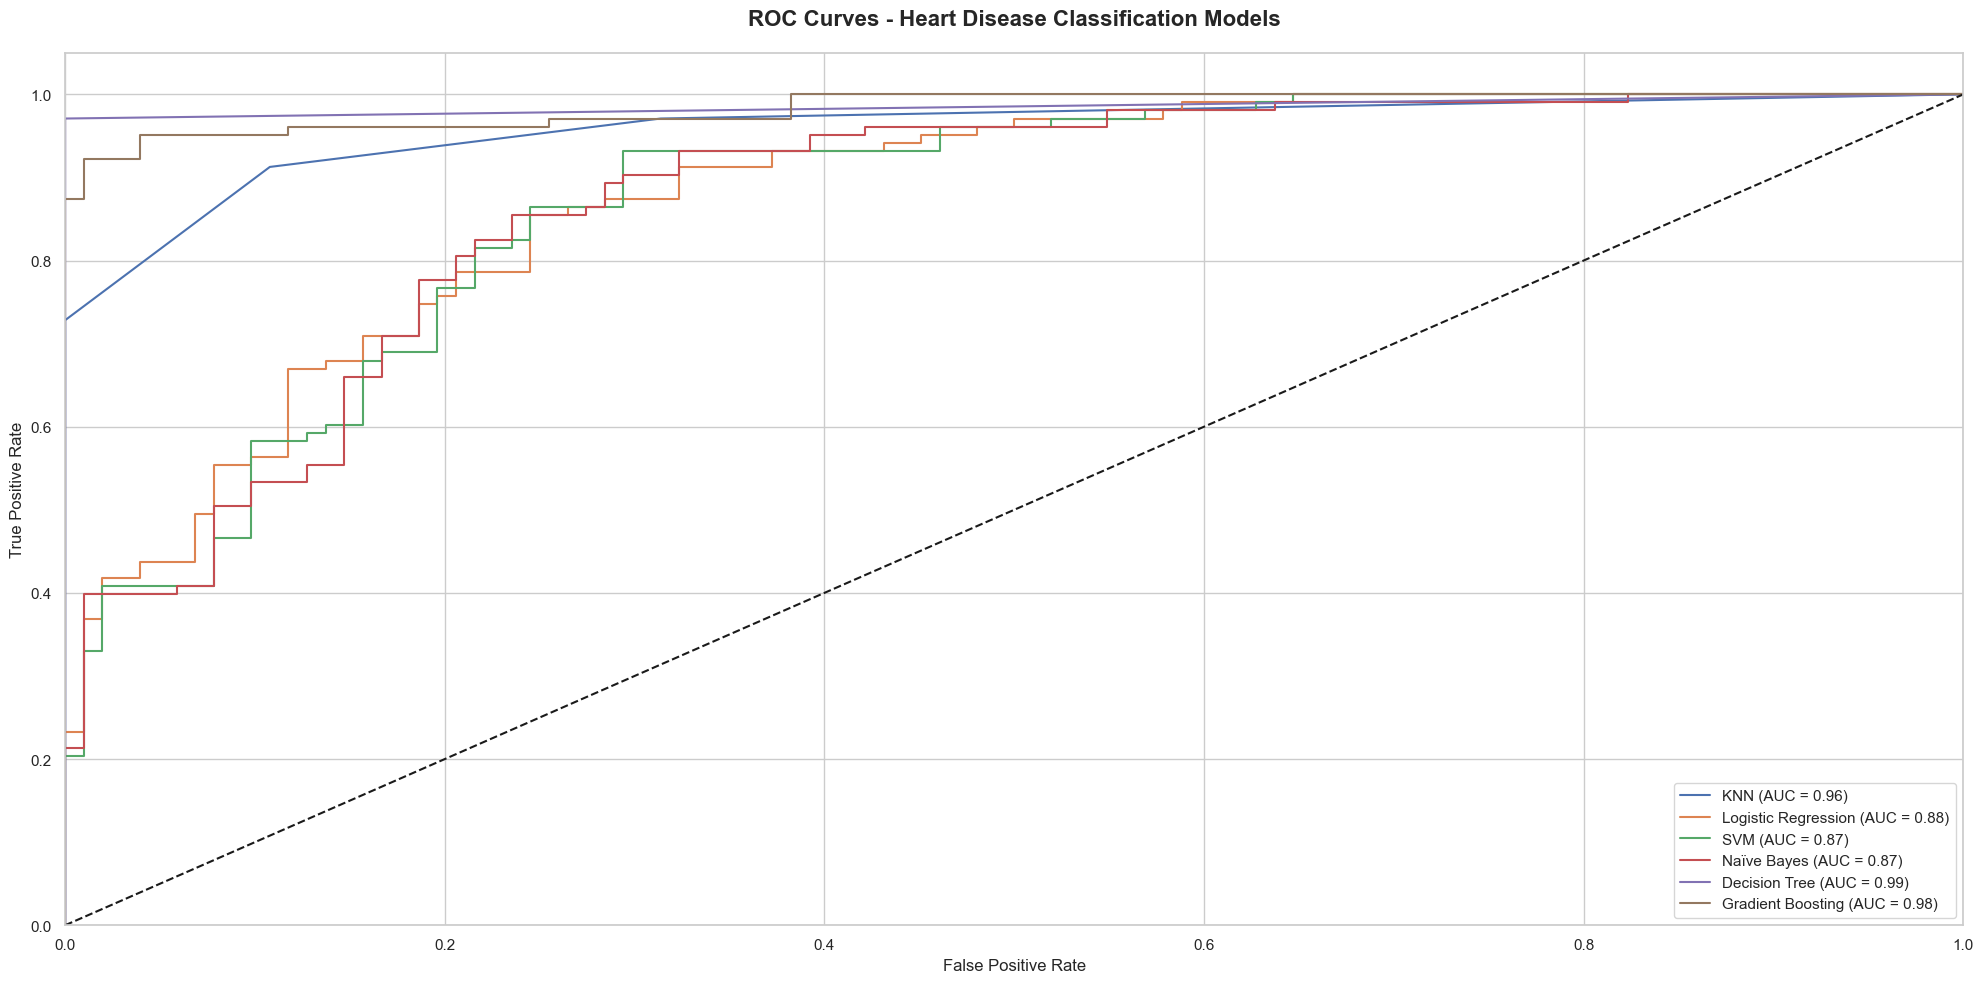

In [33]:

df_evaluation_results = pd.DataFrame(evaluation_results)

# Display evaluation results
display(df_evaluation_results)

# Plot ROC curves for all models on all datasets
plt.figure(figsize=(20, 10))
for dataset_name, (X_test, y_test) in datasets.items():
    plt.title('ROC Curves - Heart Disease Classification Models', 
              fontsize=16, 
              pad=20, 
              fontweight='bold')
    
    for model_name, model in models.items():
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Feature Importance Analysis
Analyze feature importance across different models to identify key predictors for heart disease.

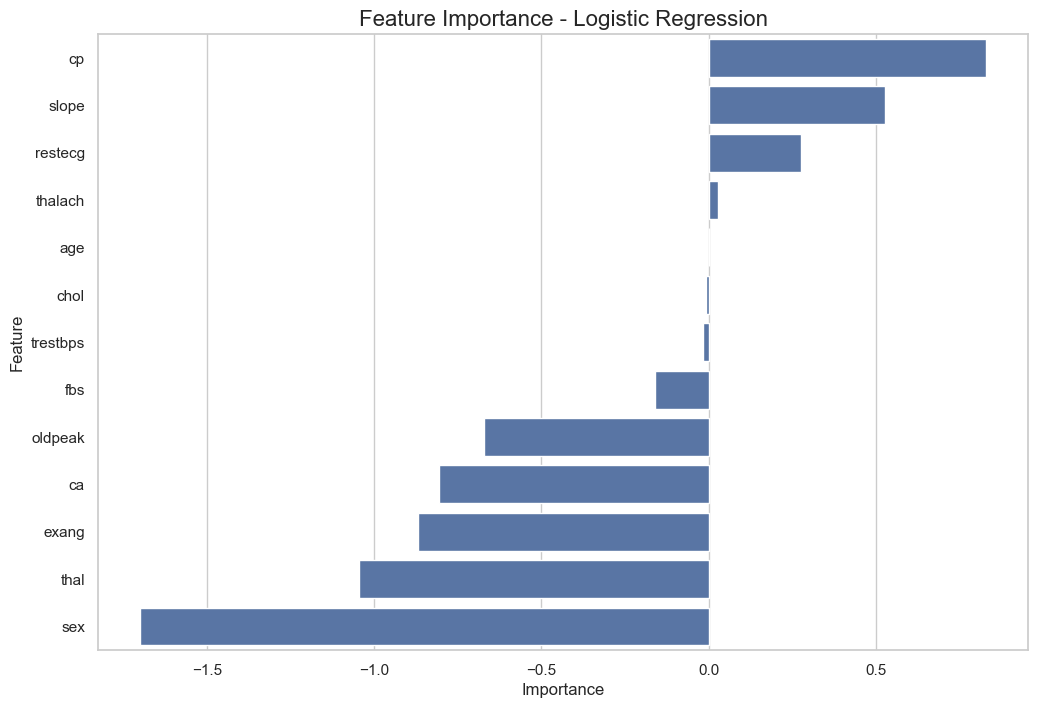

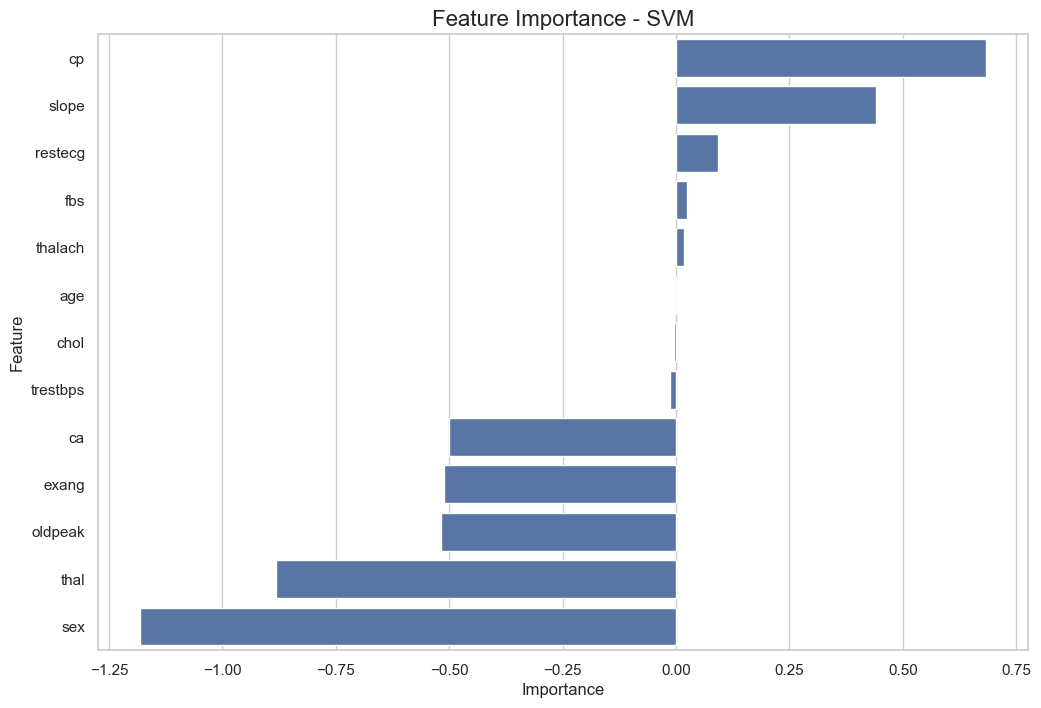

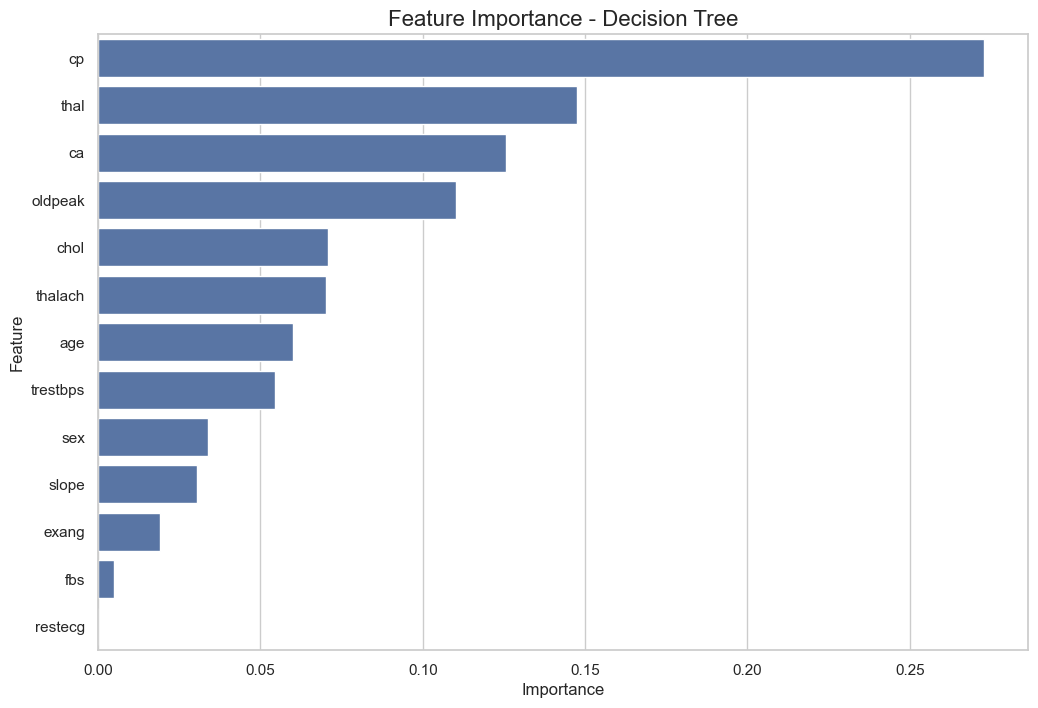

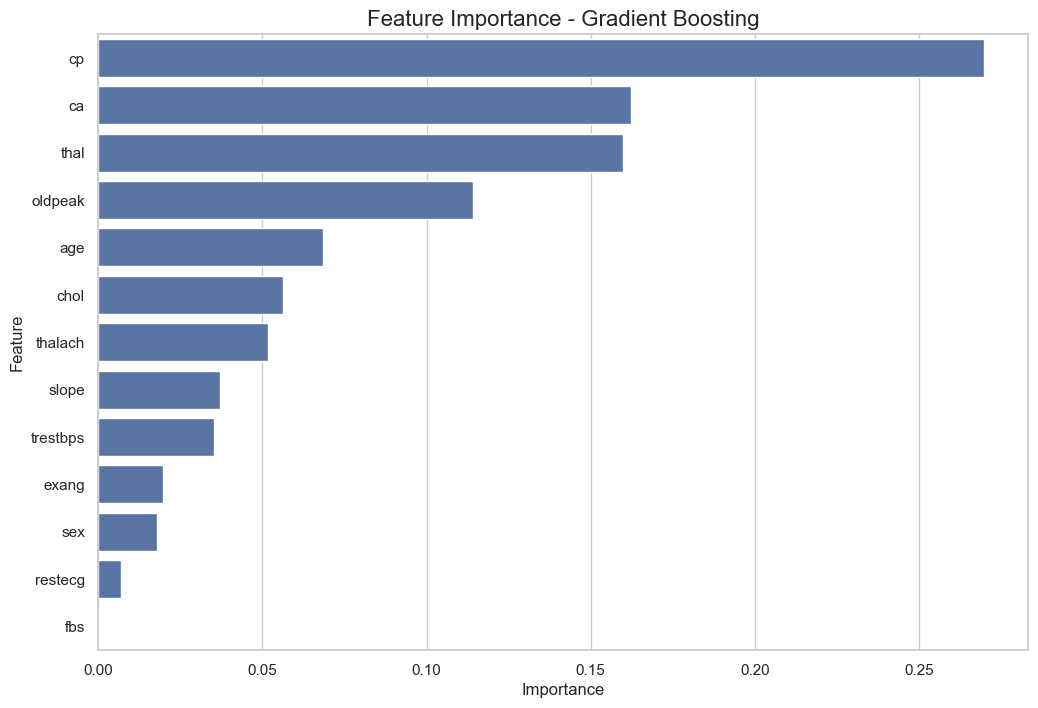

In [34]:
#Function to plot feature importance
def plot_feature_importance(model, X_train, model_name):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = model.coef_[0]
    else:
        return
    
    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)
    
    # Plot the feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importance - {model_name}', fontsize=16)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Plot feature importance for each model
for model_name, model in models.items():
    plot_feature_importance(model, X_train_hd, model_name)

# Custom Weighted Ensemble Model
Create weighted voting classifier based on model performance and feature importance scores.

In [35]:
# Define the base models with their respective weights based on their performance metrics
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('log_reg', LogisticRegression(max_iter=1000)),
    ('svm', SVC(kernel='linear', probability=True)),
    ('naive_bayes', GaussianNB()),
    ('decision_tree', DecisionTreeClassifier()),
    ('gradient_boosting', GradientBoostingClassifier(n_estimators=100))
]


### Weight Calculation Methodology

#### 1. Non-linear Transformation for Individual Metrics
For each metric (Accuracy, ROC AUC, F1-Score):
$$\text{Metric Weight} = \frac{e^{\text{Metric Value}}}{2}$$

#### 2. Combined Weighted Score 
Combine weights with predefined coefficients:
$$\text{Combined Weight}_i = 0.4 \times \text{Accuracy Weight}_i + 0.3 \times \text{ROC Weight}_i + 0.3 \times \text{F1 Weight}_i$$

#### 3. Normalize the Combined Weights
Normalize weights to sum to 1:
$$\text{Normalized Weight}_i = \frac{\text{Combined Weight}_i}{\sum \text{Combined Weights}}$$

#### Final Weight Calculation Summary

For each model (i):

1. **Accuracy Weight:**
    $$\text{Accuracy Weight}_i = \frac{e^{\text{Accuracy}_i}}{2}$$

2. **ROC AUC Weight:**
    $$\text{ROC Weight}_i = \frac{e^{\text{ROC AUC}_i}}{2}$$

3. **F1-Score Weight:**
    $$\text{F1 Weight}_i = \frac{e^{\text{F1-Score}_i}}{2}$$

4. **Combined Weight:**
    $$\text{Combined Weight}_i = 0.4 \times \text{Accuracy Weight}_i + 0.3 \times \text{ROC Weight}_i + 0.3 \times \text{F1 Weight}_i$$

5. **Normalized Weight:**
    $$\text{Normalized Weight}_i = \frac{\text{Combined Weight}_i}{\sum_{j=1}^n \text{Combined Weight}_j}$$

In [37]:
# Calculate optimal weights based on both accuracy and ROC AUC scores
def calculate_optimal_weights():
    # Get baseline metrics
    accuracy_weights = []
    roc_weights = []
    f1_weights = []
    
    for name, model in models.items():
        # Get metrics from results
        accuracy = float(models_results[models_results['Model'] == name]['Accuracy'])
        roc_auc = float(df_evaluation_results[df_evaluation_results['Model'] == name]['ROC AUC'])
        f1 = float(models_results[models_results['Model'] == name]['F1-Score'])
        
        # Apply non-linear transformation to emphasize better performers
        accuracy_weight = np.exp(accuracy) / 2
        roc_weight = np.exp(roc_auc) / 2
        f1_weight = np.exp(f1) / 2
        
        accuracy_weights.append(accuracy_weight)
        roc_weights.append(roc_weight)
        f1_weights.append(f1_weight)
    
    # Combine weights with emphasis on better metrics
    combined_weights = [0.4 * a + 0.3 * r + 0.3 * f 
                       for a, r, f in zip(accuracy_weights, roc_weights, f1_weights)]
    
    # Normalize weights
    total_weight = sum(combined_weights)
    return [w/total_weight for w in combined_weights]

# Get optimized weights
optimized_weights = calculate_optimal_weights()

# Create enhanced voting classifier
enhanced_voting_clf = VotingClassifier(
    estimators=base_models,
    voting='soft',
    weights=optimized_weights,
    n_jobs=-1
)

# Train the enhanced classifier
enhanced_voting_clf.fit(X_train_hd, y_train_hd_binary)

# Make predictions
y_pred_enhanced = enhanced_voting_clf.predict(X_test_hd)
y_prob_enhanced = enhanced_voting_clf.predict_proba(X_test_hd)[:, 1]

# Calculate metrics
accuracy_enhanced = accuracy_score(y_test_hd_binary, y_pred_enhanced)
precision_enhanced = precision_score(y_test_hd_binary, y_pred_enhanced)
recall_enhanced = recall_score(y_test_hd_binary, y_pred_enhanced)
f1_enhanced = f1_score(y_test_hd_binary, y_pred_enhanced)
roc_auc_enhanced = roc_auc_score(y_test_hd_binary, y_prob_enhanced)

print("\nEnhanced Weighted Ensemble Model Performance:")
print("-" * 45)
print(f"Accuracy:  {accuracy_enhanced:.4f}")
print(f"Precision: {precision_enhanced:.4f}")
print(f"Recall:    {recall_enhanced:.4f}")
print(f"F1-Score:  {f1_enhanced:.4f}")
print(f"ROC AUC:   {roc_auc_enhanced:.4f}")



Enhanced Weighted Ensemble Model Performance:
---------------------------------------------
Accuracy:  0.9122
Precision: 0.9048
Recall:    0.9223
F1-Score:  0.9135
ROC AUC:   0.9852



Training and evaluating KNN...

Training and evaluating Logistic Regression...

Training and evaluating SVM...

Training and evaluating Naïve Bayes...

Training and evaluating Decision Tree...

Training and evaluating Gradient Boosting...


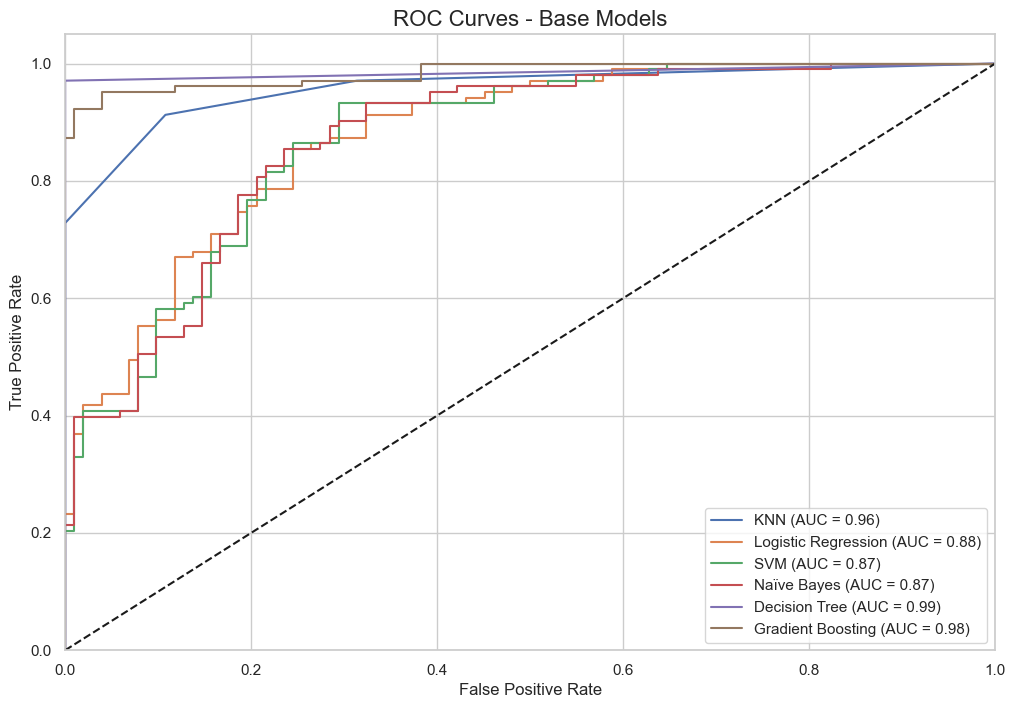

In [38]:
# Initialize lists to store model predictions and probabilities
model_predictions = []
model_probabilities = []

# Train and store predictions from each base model
for name, model in models.items():
    print(f"\nTraining and evaluating {name}...")
    
    # Get model predictions and probabilities
    model_pred = model.predict(X_test_hd)
    model_prob = model.predict_proba(X_test_hd)[:, 1]
    
    # Store predictions and probabilities
    model_predictions.append(model_pred)
    model_probabilities.append(model_prob)
    
    # Calculate and print metrics
    accuracy = accuracy_score(y_test_hd_binary, model_pred)
    precision = precision_score(y_test_hd_binary, model_pred)
    recall = recall_score(y_test_hd_binary, model_pred)
    f1 = f1_score(y_test_hd_binary, model_pred)
    roc_auc = roc_auc_score(y_test_hd_binary, model_prob)
    
    # print(f"Accuracy: {accuracy:.4f}")
    # print(f"Precision: {precision:.4f}")
    # print(f"Recall: {recall:.4f}")
    # print(f"F1-Score: {f1:.4f}")
    # print(f"ROC AUC: {roc_auc:.4f}")

# Convert predictions and probabilities to numpy arrays
model_predictions = np.array(model_predictions)
model_probabilities = np.array(model_probabilities)

#plot ROC curve for each model
plt.figure(figsize=(12, 8))
for i, name in enumerate(models.keys()):
    fpr, tpr, _ = roc_curve(y_test_hd_binary, model_probabilities[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Base Models', fontsize=16)
plt.legend(loc='lower right')
plt.show()


# Calculate weighted predictions using the optimized weights


In [39]:
weighted_probabilities = np.zeros(len(y_test_hd_binary))
for i, weight in enumerate(optimized_weights):
    weighted_probabilities += weight * model_probabilities[i]

# Convert probabilities to binary predictions using 0.5 threshold
weighted_predictions = (weighted_probabilities >= 0.5).astype(int)

# Print ensemble model performance metrics
print("\nWeighted Ensemble Model Performance:")
print("------------------------------------")
print(f"Accuracy: {accuracy_score(y_test_hd_binary, weighted_predictions):.4f}")
print(f"Precision: {precision_score(y_test_hd_binary, weighted_predictions):.4f}")
print(f"Recall: {recall_score(y_test_hd_binary, weighted_predictions):.4f}")
print(f"F1-Score: {f1_score(y_test_hd_binary, weighted_predictions):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_hd_binary, weighted_probabilities):.4f}")


Weighted Ensemble Model Performance:
------------------------------------
Accuracy: 0.9122
Precision: 0.9048
Recall: 0.9223
F1-Score: 0.9135
ROC AUC: 0.9852


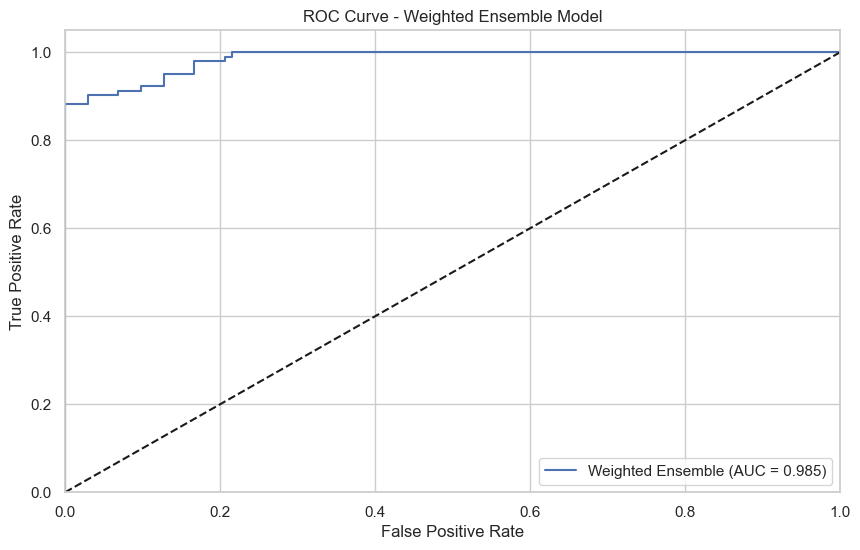

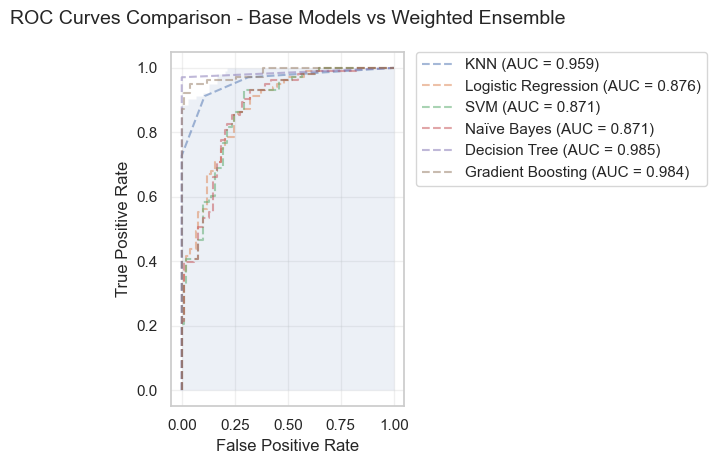

In [40]:
# Plot ROC curve for the ensemble model
plt.figure(figsize=(10, 6))
weighted_probabilities = np.zeros(len(y_test_hd_binary))
for i, weight in enumerate(optimized_weights):
    weighted_probabilities += weight * model_probabilities[i]

fpr, tpr, _ = roc_curve(y_test_hd_binary, weighted_probabilities)
plt.plot(fpr, tpr, label=f'Weighted Ensemble (AUC = {roc_auc_score(y_test_hd_binary, weighted_probabilities):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Weighted Ensemble Model')
plt.legend(loc='lower right')
plt.show()
# Add individual model ROC curves for comparison
for name, model in models.items():
    y_prob_model = model.predict_proba(X_test_hd)[:, 1]
    fpr_model, tpr_model, _ = roc_curve(y_test_hd_binary, y_prob_model)
    plt.plot(fpr_model, tpr_model, '--', alpha=0.5, label=f'{name} (AUC = {roc_auc_score(y_test_hd_binary, y_prob_model):.3f})')

# Customize plot appearance
plt.grid(True, alpha=0.3)
plt.fill_between(fpr, tpr, alpha=0.1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison - Base Models vs Weighted Ensemble', fontsize=14, pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

# Ensemble Model Evaluation
Evaluate the custom weighted ensemble model and compare performance against base models.

In [41]:
# Create weighted voting classifier
weighted_voting_clf = VotingClassifier(
	estimators=base_models,
	voting='soft',
	weights=optimized_weights,
	n_jobs=-1
)

# Train the weighted voting classifier
weighted_voting_clf.fit(X_train_hd, y_train_hd_binary)

# Evaluate the custom weighted ensemble model on the heart disease dataset
accuracy_hd, precision_hd, recall_hd, f1_hd, roc_auc_hd = evaluate_model(weighted_voting_clf, X_test_hd, y_test_hd_binary)
print("\nCustom Weighted Ensemble Model - Heart Disease Dataset")
print("-" * 45)
print(f"Accuracy: {accuracy_hd:.4f}")
print(f"Precision: {precision_hd:.4f}")
print(f"Recall: {recall_hd:.4f}")
print(f"F1-Score: {f1_hd:.4f}")
print(f"ROC AUC: {roc_auc_hd:.4f}\n")

# Add ensemble model results to evaluation results
evaluation_results["Model"].append("Custom Weighted Ensemble")
evaluation_results["Dataset"].append("Heart Disease")
evaluation_results["Accuracy"].append(accuracy_hd)
evaluation_results["Precision"].append(precision_hd)
evaluation_results["Recall"].append(recall_hd)
evaluation_results["F1-Score"].append(f1_hd)
evaluation_results["ROC AUC"].append(roc_auc_hd)

# Convert updated evaluation results to DataFrame
df_evaluation_results = pd.DataFrame(evaluation_results)

# Display updated evaluation results
display(df_evaluation_results)



Custom Weighted Ensemble Model - Heart Disease Dataset
---------------------------------------------
Accuracy: 0.9122
Precision: 0.9048
Recall: 0.9223
F1-Score: 0.9135
ROC AUC: 0.9852



,Model,Dataset,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,KNN,Heart Disease,0.902439,0.895238,0.912621,0.903846,0.958643
1,Logistic Regression,Heart Disease,0.795122,0.756303,0.873786,0.810811,0.876356
2,SVM,Heart Disease,0.804878,0.756098,0.902913,0.823009,0.871026
3,Naïve Bayes,Heart Disease,0.800000,0.754098,0.893204,0.817778,0.871407
4,Decision Tree,Heart Disease,0.985366,1.000000,0.970874,0.985222,0.985437
5,Gradient Boosting,Heart Disease,0.951220,0.951456,0.951456,0.951456,0.983628
6,Custom Weighted Ensemble,Heart Disease,0.912195,0.904762,0.922330,0.913462,0.985151


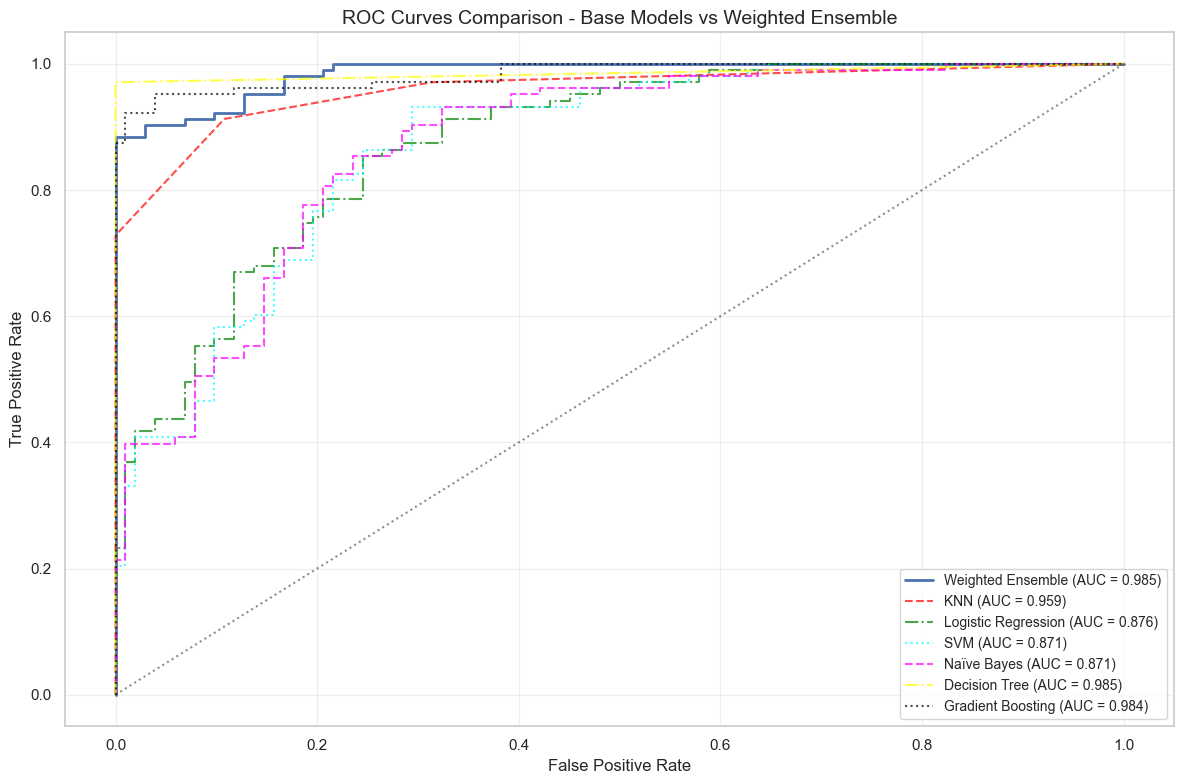

In [42]:
plt.figure(figsize=(12, 8))

# Plot ROC curve for the weighted ensemble model
fpr, tpr, _ = roc_curve(y_test_hd_binary, weighted_probabilities)
plt.plot(fpr, tpr, 'b-', linewidth=2, label=f'Weighted Ensemble (AUC = {roc_auc_score(y_test_hd_binary, weighted_probabilities):.3f})')

# Define colors and line styles for individual models
linestyles = ['--', '-.', ':', '--', '-.', ':', '--']
colors = ['red', 'green', 'cyan', 'magenta', 'yellow', 'black', '#FFA500']  # Using hex code for orange

# Plot ROC curves for individual models
for (name, model), color, ls in zip(models.items(), colors, linestyles):
    y_prob_model = model.predict_proba(X_test_hd)[:, 1]
    fpr_model, tpr_model, _ = roc_curve(y_test_hd_binary, y_prob_model)
    plt.plot(fpr_model, tpr_model, color=color, linestyle=ls, alpha=0.7,
             label=f'{name} (AUC = {roc_auc_score(y_test_hd_binary, y_prob_model):.3f})')

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k:', alpha=0.5)

# Customize plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison - Base Models vs Weighted Ensemble', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

In [43]:
import joblib

# Save the enhanced voting classifier
joblib.dump(enhanced_voting_clf, 'heart_disease_model.joblib')

# Optional: Save the scaler as well since it's needed for preprocessing new data
joblib.dump(scaler, 'heart_disease_scaler.joblib')

print("Model and scaler have been saved successfully.")

Model and scaler have been saved successfully.


In [45]:
def test_heart_disease_prediction(data, models_dict, ensemble_model):
    """
    Test function to predict heart disease using both base models and ensemble model
    
    Parameters:
    data (dict): Dictionary containing patient data
    models_dict (dict): Dictionary of base models
    ensemble_model (VotingClassifier): Enhanced ensemble model
    
    Returns:
    dict: Prediction results from all models
    """
    # Convert input data to DataFrame format
    input_data = pd.DataFrame([data])
    
    # Load the scaler
    scaler = joblib.load('heart_disease_scaler.joblib')
    
    # Scale the input data
    scaled_data = scaler.transform(input_data)
    
    # Initialize results dictionary
    results = {
        'base_models': {},
        'ensemble': None
    }
    
    # Get predictions from base models
    for name, model in models_dict.items():
        prediction = model.predict(scaled_data)[0]
        probability = model.predict_proba(scaled_data)[0][1]
        results['base_models'][name] = {
            'prediction': int(prediction),
            'probability': float(probability)
        }
    
    # Get ensemble model prediction
    ensemble_pred = ensemble_model.predict(scaled_data)[0]
    ensemble_prob = ensemble_model.predict_proba(scaled_data)[0][1]
    results['ensemble'] = {
        'prediction': int(ensemble_pred),
        'probability': float(ensemble_prob)
    }
    
    return results

# Example usage:
test_data = {
    'age': 0.479,         # Scaled age (e.g., normalized to [0, 1])
    'sex': 1.0,           # 1 = Male, 0 = Female (scaled)
    'cp': 0.0,            # Chest pain type (scaled, 0-3)
    'trestbps': 0.4,      # Resting blood pressure (scaled)
    'chol': 0.3,          # Serum cholesterol in mg/dl (scaled)
    'fbs': 0.0,           # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false, scaled)
    'restecg': 0.5,       # Resting ECG results (0-2, scaled)
    'thalach': 0.7,       # Maximum heart rate achieved (scaled)
    'exang': 0.0,         # Exercise-induced angina (1 = yes; 0 = no, scaled)
    'oldpeak': 0.2,       # ST depression induced by exercise relative to rest (scaled)
    'slope': 1.0,         # Slope of the peak exercise ST segment (0-2, scaled)
    'ca': 0.0,            # Number of major vessels (0-4, scaled)
    'thal': 1.0           # Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect, scaled)
}

# Test the models
results = test_heart_disease_prediction(test_data, models, enhanced_voting_clf)

# Print results
print("\nPrediction Results:")
print("-" * 50)
print("\nBase Models:")
for model_name, result in results['base_models'].items():
    print(f"{model_name}:")
    print(f"  Prediction: {'Positive' if result['prediction'] == 1 else 'Negative'}")
    print(f"  Probability: {result['probability']:.3f}")

print("\nEnhanced Ensemble Model:")
print(f"Prediction: {'Positive' if results['ensemble']['prediction'] == 1 else 'Negative'}")
print(f"Probability: {results['ensemble']['probability']:.3f}")


Prediction Results:
--------------------------------------------------

Base Models:
KNN:
  Prediction: Negative
  Probability: 0.000
Logistic Regression:
  Prediction: Positive
  Probability: 0.902
SVM:
  Prediction: Positive
  Probability: 0.913
Naïve Bayes:
  Prediction: Negative
  Probability: 0.000
Decision Tree:
  Prediction: Negative
  Probability: 0.000
Gradient Boosting:
  Prediction: Negative
  Probability: 0.137

Enhanced Ensemble Model:
Prediction: Negative
Probability: 0.307
